# Exercise 1 

In this exercise, we will practice applying a denoising encoder using the `MNIST` dataset.

### Exercise 1(a) (5 points)

Load the below libraries and the `MNIST` dataset.

```
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

from tensorflow.keras.datasets import mnist

np.random.seed(11)
tf.random.set_seed(11)
batch_size = 256
max_epochs = 50
learning_rate = 1e-3
momentum = 8e-1
hidden_dim = 128
original_dim = 784
```

In [13]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

from tensorflow.keras.datasets import mnist

np.random.seed(11)
tf.random.set_seed(11)
batch_size = 256
max_epochs = 50
learning_rate = 1e-3
momentum = 8e-1
hidden_dim = 128
original_dim = 784

### Exercise 1(b) (5 points)

Load the `MNIST` data, and visualize the first 10 images from the `train` and `test` data sets.

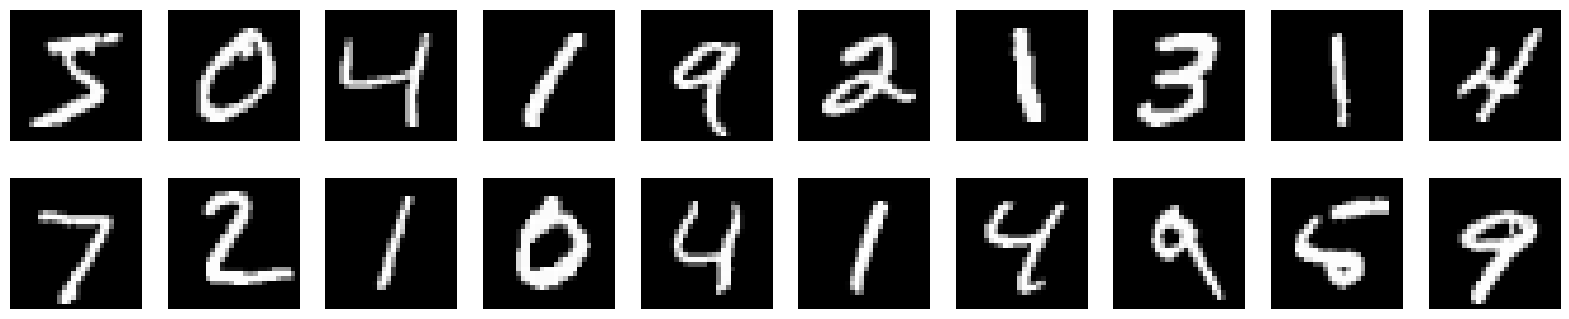

In [14]:
(x_train, _), (x_test, _) = mnist.load_data()

n = 10 
plt.figure(figsize=(20, 8))
for i in range(n):
    plt.subplot(1, n, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    
    plt.subplot(2, n, i+1+n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

### Exercise 1(c) (3 points)

Normalize the data by dividing by 255. Then, reshape the data.

In [15]:
x_train = x_train / 255
x_test = x_test / 255

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

#reshaping the input data
x_train = x_train.reshape((x_train.shape[0], original_dim))
x_test = x_test.reshape((x_test.shape[0], original_dim))

### Exercise 1(d) (3 points)

Add noise to the `train` and `test` data sets.

In [16]:
#adding noise to the data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

### Exercise 1(e) (10 points)

Define the denoising encoder model.

In [17]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, hidden_dim):
        super(Encoder, self).__init__()
        self.hidden_layer = Dense(units=hidden_dim, activation="relu")

    def call(self, input_features):
        activation = self.hidden_layer(input_features)
        return activation

class Decoder(tf.keras.layers.Layer):
    def __init__(self, hidden_dim, original_dim):
        super(Decoder, self).__init__()
        self.output_layer = Dense(units=original_dim, activation="relu")

    def call(self, encoded):
        activation = self.output_layer(encoded)
        return activation 

class Autoencoder(Model):
    def __init__(self, hidden_dim, original_dim):
        super(Autoencoder, self).__init__()
        self.loss = []
        self.encoder = Encoder(hidden_dim=hidden_dim)
        self.decoder = Decoder(hidden_dim=hidden_dim, original_dim=original_dim)

    def call(self, input_features):
        encoded = self.encoder(input_features)
        reconstructed = self.decoder(encoded)
        return reconstructed

### Exercise 1(f) (6 points)

Train the autoencoder using the `train` and noisy `train`, and validate it with the `test` and noisy `test`. Visualize the loss.

In [18]:
# create an instance of the model
model = Autoencoder(hidden_dim=hidden_dim, original_dim=original_dim)

# compile the model
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate))

#trian the model
loss = model.fit(x_train_noisy, x_train, validation_data=(x_test_noisy, x_test), epochs=max_epochs, batch_size=batch_size)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0597 - val_loss: 0.0256
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0245 - val_loss: 0.0213
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0211 - val_loss: 0.0199
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0199 - val_loss: 0.0193
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0193 - val_loss: 0.0189
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0189 - val_loss: 0.0187
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0187 - val_loss: 0.0185
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0186 - val_loss: 0.0185
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0185 - val_loss: 0.0183
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0183 - val_loss: 0.0182
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0182 - val_loss: 0.0182
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

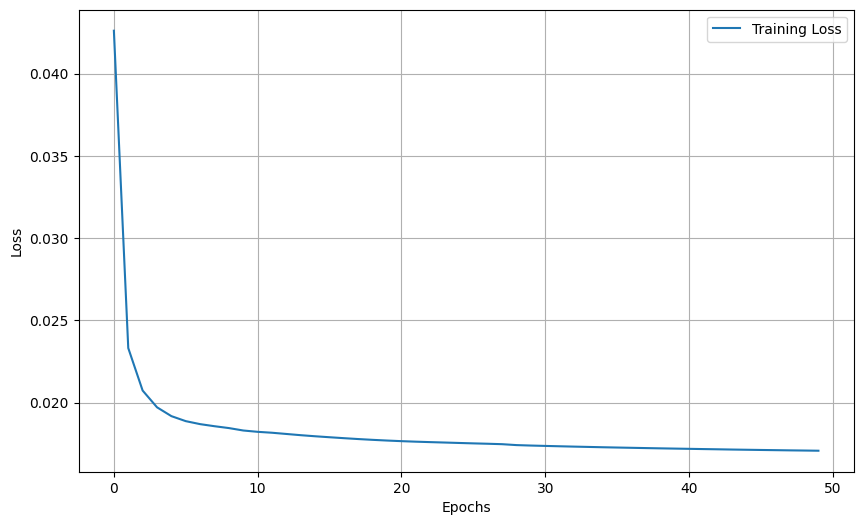

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(range(max_epochs), loss.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show();

### Exercise 1(g) (6 points)

Visualize the first 10 images from the noisy `test` data, and their corresponding denoised images.

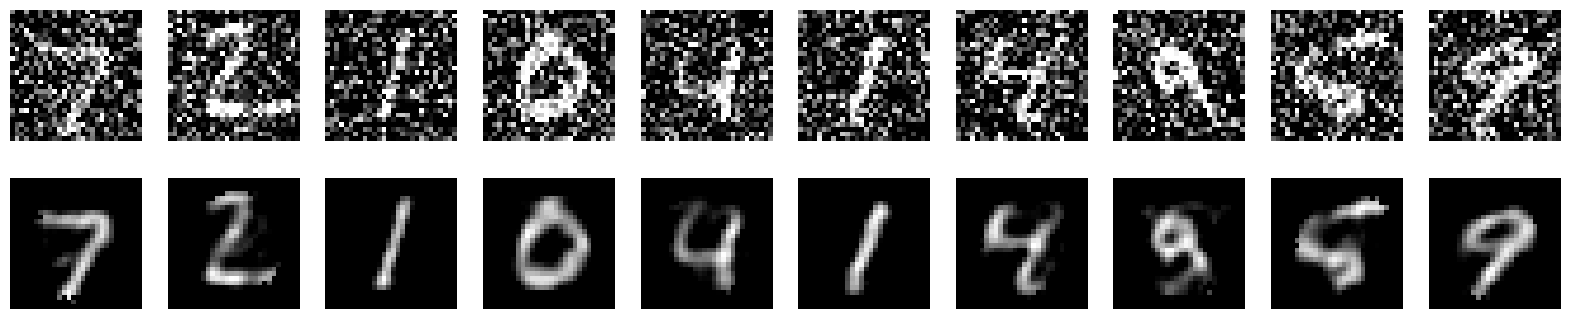

In [20]:
n = 10 
plt.figure(figsize=(20, 8))
for i in range(n):
    plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    
    plt.subplot(2, n, i+1+n)
    plt.imshow(model(x_test_noisy)[i].numpy().reshape(28, 28), cmap='gray')
    plt.axis('off')